### Exercício 2

#### Pratica 1 -  Dataset 2D (datasets/2d_dataset.csv)

#### Descricao

Atributos

- alpha (numérico): valor x
- beta (numérico): valor y
- y (0 ou 1, numérico): classe

Etapas:
1. Importe as bibliotecas necessárias para analise dos dados
```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
```
2. Carregue o Dataset em um DataFrame
```python
df = pd.read_csv('datasets/2d_dataset.csv')
```
3. Treine modelos de:
    1. kNN (efetuando as etapas de preprocessamento necessárias)
    2. Árvore de Decisão (efetuando as etapas de preprocessamento necessárias)
    3. Random Forest (efetuando as etapas de preprocessamento necessárias)
4. Avalie os modelos treinados
    - Utilize a avaliação através do sklearn
    ```python
    from sklearn.metrics import accuracy_score
    accuracy_score(predicao, classe)
    ```
5. Faça busca dos melhores hiperparametros dos classificadores
    - Quantidade de instâncias mínimas em um nó da árvore de decisão para efetuar o split (min_samples_split de 2 a 200)
        - Plote a relação entre min_samples_split X acurácia
        - Plote a relação entre min_samples_split X tamanho da árvore (.tree_.node_count)
        - Plote a relação entre min_samples_split X tempo de teste
    - Quantidade de árvores do Random Forest (n_estimators de 10 a 1000, incrementando 10)
        - Plote a relação entre n_estimators X acurácia
        - Plote a relação entre n_estimators X tempo de teste
    - Quantidade de vizinhos do kNN (n_neighbors de 5 a 100)
        - Plote a relação entre n_neighbors X acurácia
        - Plote a relação entre n_neighbors X tempo de teste

- Para medir o tempo utilize o seguinte código
```python
import time
comeco = time.time()
# seu codigo aqui
tempo_total = time.time() - comeco
```

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MaxAbsScaler

In [23]:
df = pd.read_csv('datasets/2d_dataset.csv')

In [24]:
df.describe()

,y,alpha,beta
count,2994.000000,2994.000000,2994.000000
mean,0.656981,500.917502,501.393454
std,0.474797,289.387318,286.933215
min,0.000000,0.000000,0.000000
25%,0.000000,248.000000,256.000000
50%,1.000000,505.500000,499.000000
75%,1.000000,755.000000,749.000000
max,1.000000,998.000000,999.000000


In [25]:
df.dtypes

y        int64
alpha    int64
beta     int64
dtype: object

In [26]:
features = np.array(df.drop(['y'], axis = 1))
label = np.array(df['y'])

In [27]:
scaler = MaxAbsScaler()
scaler.fit(features)
featuresNormalizadas = scaler.transform(features)

In [31]:
# Decision Tree
tree = DecisionTreeClassifier(min_samples_split = 50)
tree.fit(featuresNormalizadas, label)
predictTree = tree.predict(featuresNormalizadas)
accTree = accuracy_score(predictTree, label)

#Random Forest
forest = RandomForestClassifier(n_estimators = 10)
forest.fit(featuresNormalizadas, label)
predictForest = forest.predict(featuresNormalizadas)
accForest = accuracy_score(predictForest, label)

#KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(featuresNormalizadas, label)
predicaoKNN = knn.predict(featuresNormalizadas)
accKNN = accuracy_score(predicaoKNN, label)

accTree,accForest,accKNN,tree.tree_.node_count

(0.9024716098864396, 0.9966599866399466, 0.9716098864395457, 161)

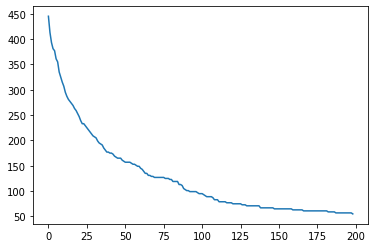

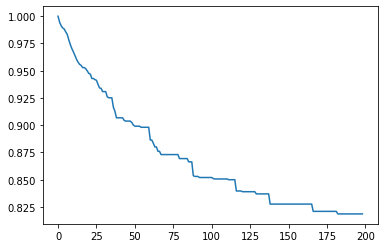

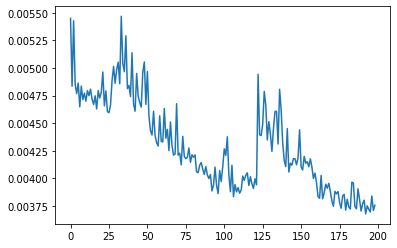

In [29]:
# Testando hiperparametros
import time

arr_acc =[]
arr_time = []
arr_size = []

for sample in range(2,201):
    start = time.time()
    
    tree = DecisionTreeClassifier(min_samples_split= sample)
    # Training
    tree.fit(attrs, _class)
    
    # Test
    predictTree = tree.predict(attrs)
    accTree = accuracy_score(predictTree, _class)
    
    arr_size.append(tree.tree_.node_count)
    arr_acc.append(accTree)
    arr_time.append(time.time() - start)
    
plt.plot(arr_size)
plt.show()
plt.plot(arr_acc)
plt.show()
plt.plot(arr_time)
plt.show()

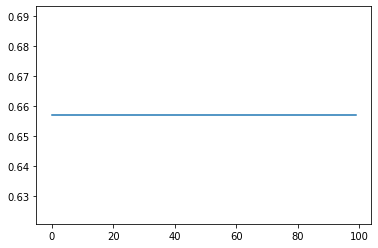

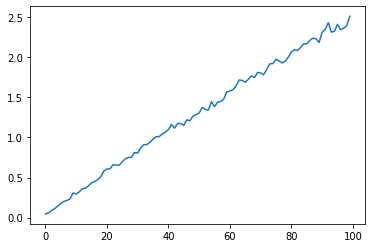

In [30]:
# Step 5.2

#Quantidade de árvores do Random Forest (n_estimators de 10 a 1000, incrementando 10)
#Plote a relação entre n_estimators X acurácia
#Plote a relação entre n_estimators X tempo de teste

import time
from sklearn.preprocessing import MaxAbsScaler


arr_acc =[]
arr_time = []

scaler = MaxAbsScaler()
scaler.fit(attrs)
attrs = scaler.transform(attrs)

for estimator in range(10,1001,10):
    start = time.time()
    
    forest = RandomForestClassifier(n_estimators = estimator)
    # Training
    forest.fit(attrs, _class)
    
    # Test
    predictTree = tree.predict(attrs)
    accTree = accuracy_score(predictTree, _class)
    
    arr_acc.append(accTree)
    arr_time.append(time.time() - start)
    
plt.plot(arr_acc)
plt.show()
plt.plot(arr_time)
plt.show()

#### Pratica  2 - Income Classification (datasets/income.csv)

#### Descricao


Problema

The Us Adult income dataset was extracted by Barry Becker from the 1994 US Census Database. The data set consists of anonymous information such as occupation, age, native country, race, capital gain, capital loss, education, work class and more.
Each row is labelled as either having a salary greater than ">50K" or "<=50K".

Atributos

- age (numérico): idade.
- workclass (nominal): Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt (numérico): continuous.
- education (nominal): Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num (numérico): continuous.
- marital-status (nominal): Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation (nominal): Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship (nominal): Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race (nominal): White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex (nominal): Female, Male.
- capital-gain (numérico): continuous.
- capital-loss (numérico): continuous.
- hours-per-week (numérico): continuous.
- native-country (nominal): United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income (>50K ou <=50K, nominal): classe

Etapas:
1. Trabalhe com o dataset acima utilizando os primeiros 2000 eventos apenas
    - Atenção este dataset possui dados nominais!
        ```python
        dfNumerico = pd.get_dummies(df, prefix_sep='_', drop_first=True)
        dfNumerico = dfNumerico.head(2000)
        ```
2. Faça busca dos melhores hiperparametros dos classificadores
    - Quantidade de instâncias mínimas em um nó da árvore de decisão para efetuar o split (min_samples_split de 2 a 200)
        - Plote a relação entre min_samples_split X acurácia
        - Plote a relação entre min_samples_split X tamanho da árvore (.tree_.node_count)
        - Plote a relação entre min_samples_split X tempo de teste
    - Quantidade de árvores do Random Forest (n_estimators de 10 a 1000, incrementando 10)
        - Plote a relação entre n_estimators X acurácia
        - Plote a relação entre n_estimators X tempo de teste
    - Quantidade de vizinhos do kNN (n_neighbors de 5 a 100)
        - Plote a relação entre n_neighbors X acurácia
        - Plote a relação entre n_neighbors X tempo de teste
        
3. Compare o tempo de treinamento, tempo de teste e acurácia dos três classificadores nos melhores casos

#### Pratica 3 - Classificação de RaioX relacionado a Covid-19 (datasets/covid/covid.csv)

#### Descricao

Problema

Dataset com raio-X de pacientes com e sem COVID-19.
- Pasta datasets/covid/Normal possui os arquivos originais com pacientes sem COVID-19
- Pasta datasets/covid/Covid possui os arquivos originais com pacientes com COVID-19
Dataset

Atributos

- histo_0 (numérico): Ocorrencias do pixel com valor 0 na imagem de entrada
- histo_1 (numérico): Ocorrencias do pixel com valor 1 na imagem de entrada
- ...
- histo_255 (numérico): Ocorrencias do pixel com valor 255 na imagem de entrada
- arquivo (nominal): nome do arquivo que gerou a entrada (estará nas pastas datasets/covid/Covid ou datasets/covid/Normal de acordo com a sua label
- label (normal ou covid, nominal): classe

Etapas:
1. Determine o melhor classificador para classificar raio X relacionados a COVID
2. Determine o melhor classificador para classificar raio X que não sejam COVID